## DATA Ingestion 

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df_main = pd.read_csv('data/gemstone.csv')

In [82]:
df = df_main.sample(n=int((0.4 * len(df_main))))

In [83]:
df.isnull().sum()

Unnamed: 0    0
id            0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77429 entries, 1033 to 115211
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  77429 non-null  int64  
 1   id          77429 non-null  int64  
 2   carat       77429 non-null  float64
 3   cut         77429 non-null  object 
 4   color       77429 non-null  object 
 5   clarity     77429 non-null  object 
 6   depth       77429 non-null  float64
 7   table       77429 non-null  float64
 8   x           77429 non-null  float64
 9   y           77429 non-null  float64
 10  z           77429 non-null  float64
 11  price       77429 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 7.7+ MB


In [85]:
df.drop(labels=['id'], axis=1, inplace=True)

In [86]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
1033,1033,0.40,Very Good,D,VS2,62.8,55.0,4.68,4.70,2.95,1050
179889,179889,1.00,Very Good,E,SI2,61.2,60.0,6.33,6.37,3.89,4118
23742,23742,0.93,Good,D,SI1,63.1,57.0,6.16,6.22,3.90,5101
165414,165414,1.21,Ideal,G,VS1,62.0,55.0,6.88,6.85,4.25,8483
44007,44007,0.30,Ideal,G,SI1,61.4,55.0,4.32,4.35,2.66,445


In [87]:
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [88]:
df.duplicated().sum()

0

### segregating numeric and catagorical columns

In [89]:
cat_cols = df.columns[df.dtypes == 'object']
num_cols = df.columns[df.dtypes != 'object']

In [90]:
num_cols, cat_cols

(Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object'),
 Index(['cut', 'color', 'clarity'], dtype='object'))

In [91]:
df[cat_cols].describe()

,cut,color,clarity
count,77429,77429,77429
unique,5,7,8
top,Ideal,G,SI1
freq,36871,17797,21150


In [92]:
df['cut'].value_counts()

cut
Ideal        36871
Premium      20076
Very Good    15081
Good          4626
Fair           775
Name: count, dtype: int64

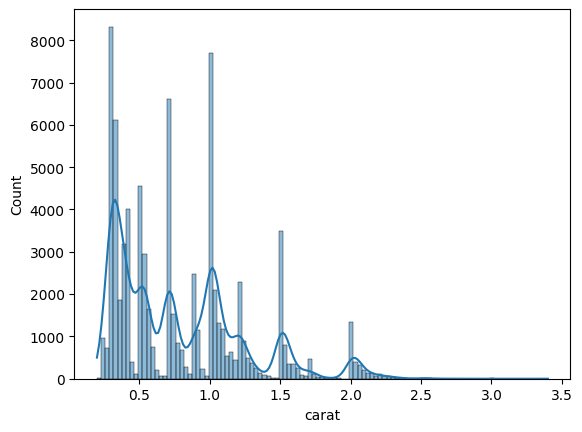

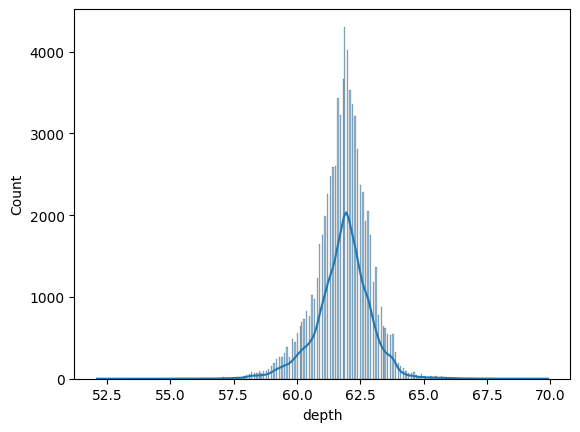

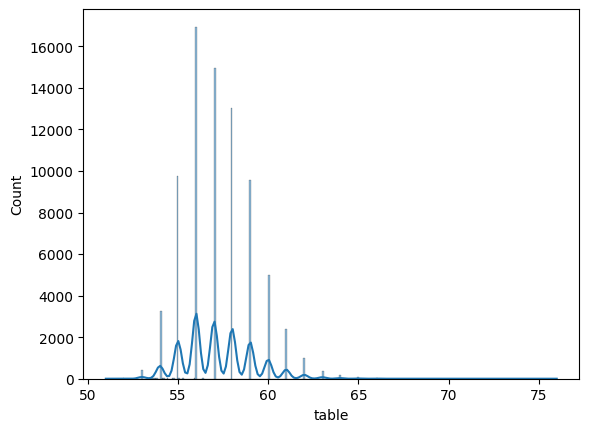

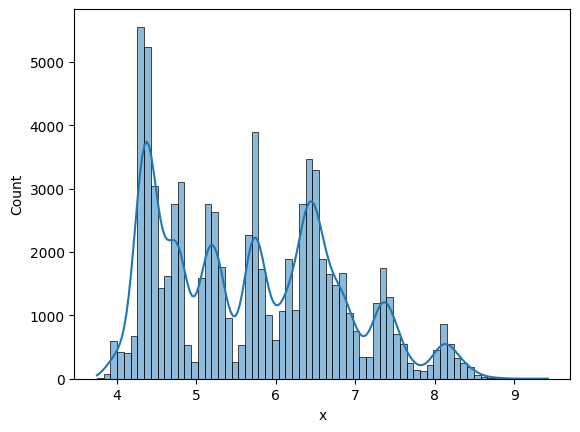

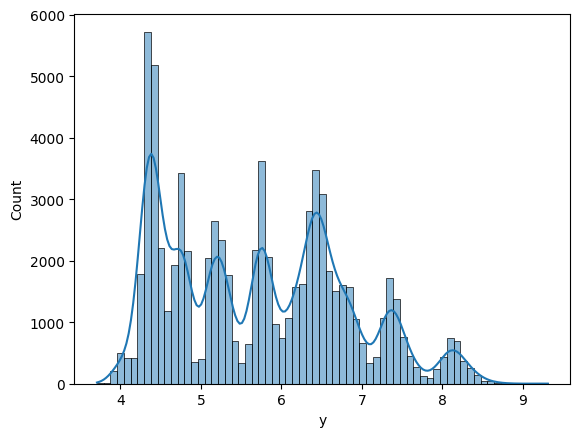

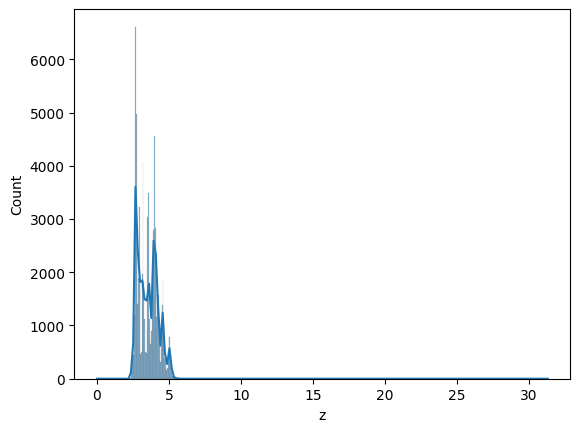

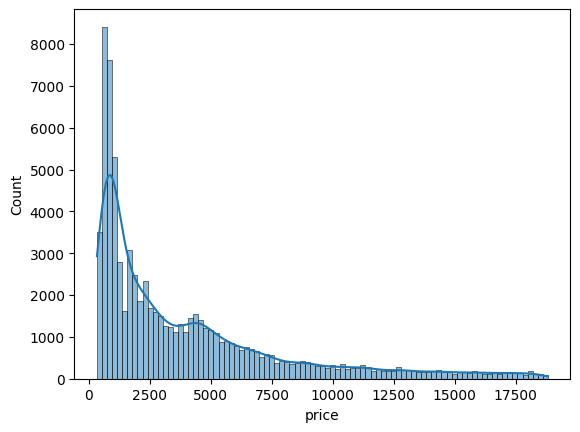

In [100]:
for col in num_cols:
    sns.histplot(data=df[col],kde=True)
    plt.show()


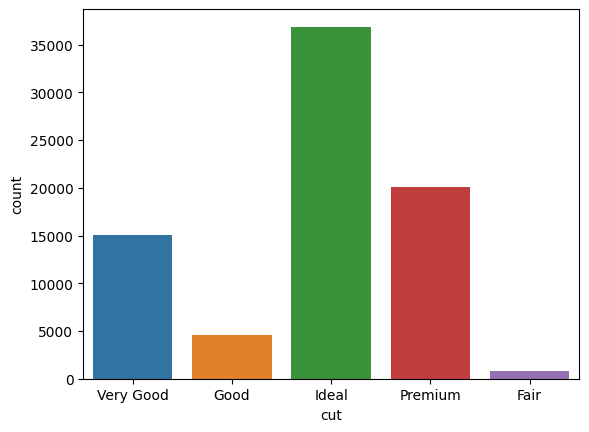

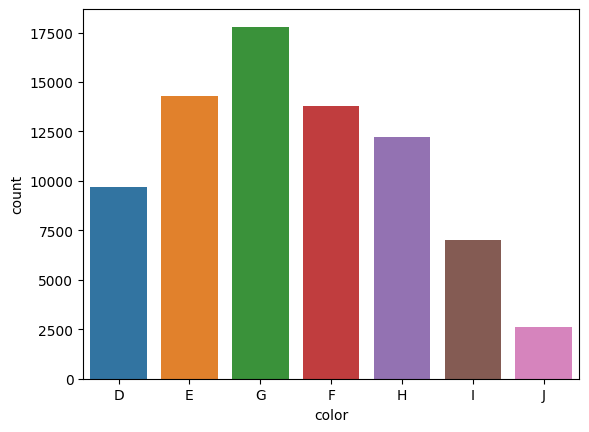

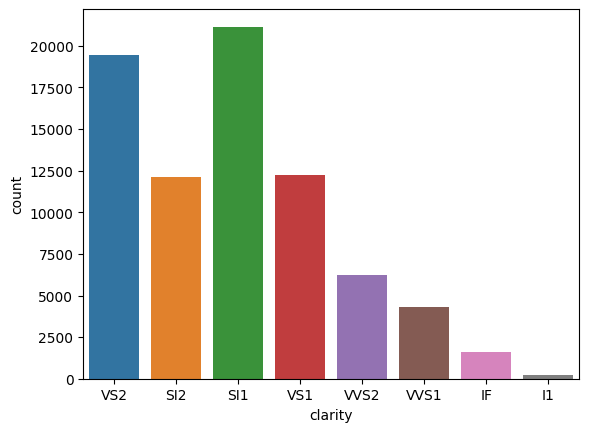

In [102]:
for col in cat_cols:
    sns.countplot(x=df[col])
    plt.show()

<Axes: >

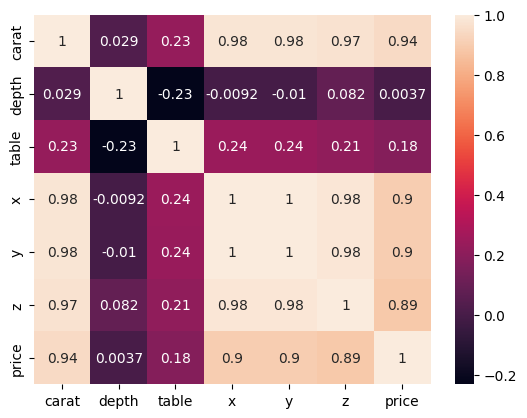

In [107]:
sns.heatmap(df[num_cols].corr(), annot=True)